1.  Create the following  data  set for Experience and  Salary  in CSV.  Applying SLR, explore the relationship between  salary and experience with  exerience in x-axis and salary in y axis.  

a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.  

b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE).

c. Try with different values of intercept for slope beta  between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE). 

d. Use the scikit learn and compare the results of MSE. 
 

2. Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error for 60 iterations of 5 epochs.

a. Plot the graph of error versus iteration.

b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.

c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.
 
  


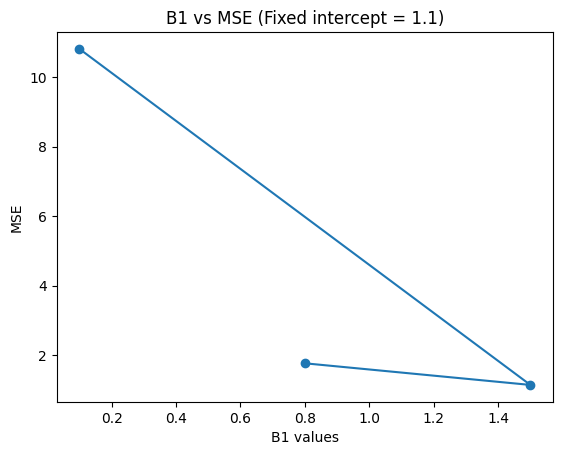

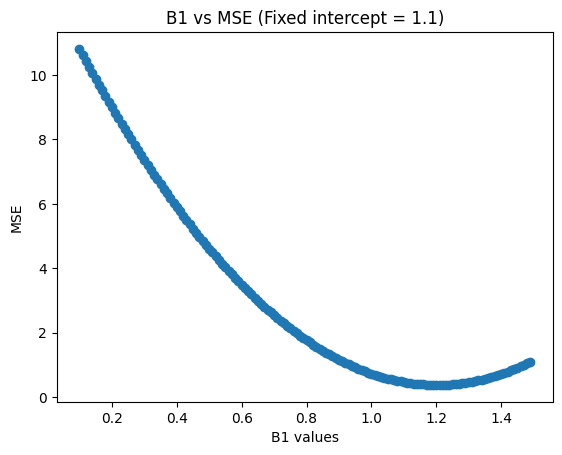

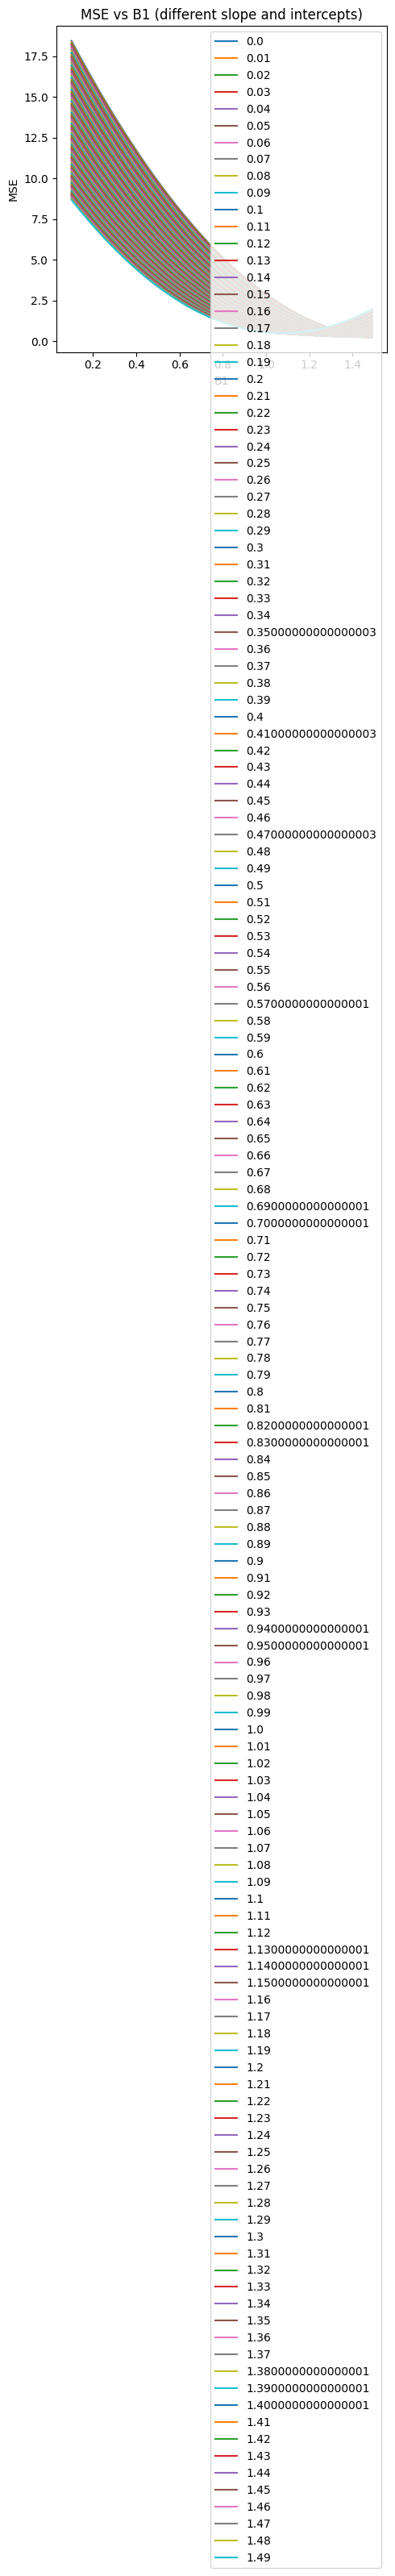

Epoch 1/5,Iteration 0/60, Cost:13.947931177600003
Epoch 1/5,Iteration 1/60, Cost:9.353328098005512
Epoch 1/5,Iteration 2/60, Cost:6.363226585443575
Epoch 1/5,Iteration 3/60, Cost:4.406250582230973
Epoch 1/5,Iteration 4/60, Cost:3.116854327974045
Epoch 1/5,Iteration 5/60, Cost:2.260681634196038
Epoch 1/5,Iteration 6/60, Cost:1.687094256064503
Epoch 1/5,Iteration 7/60, Cost:1.2989589197268032
Epoch 1/5,Iteration 8/60, Cost:1.0334018676608951
Epoch 1/5,Iteration 9/60, Cost:0.8495364402867245
Epoch 1/5,Iteration 10/60, Cost:0.7206267501827849
Epoch 1/5,Iteration 11/60, Cost:0.6290756518162947
Epoch 1/5,Iteration 12/60, Cost:0.5632125430948324
Epoch 1/5,Iteration 13/60, Cost:0.5152294961533609
Epoch 1/5,Iteration 14/60, Cost:0.47985111940785524
Epoch 1/5,Iteration 15/60, Cost:0.4534740914364725
Epoch 1/5,Iteration 16/60, Cost:0.4336080106052605
Epoch 1/5,Iteration 17/60, Cost:0.41851008276492946
Epoch 1/5,Iteration 18/60, Cost:0.406944923632875
Epoch 1/5,Iteration 19/60, Cost:0.398025445566

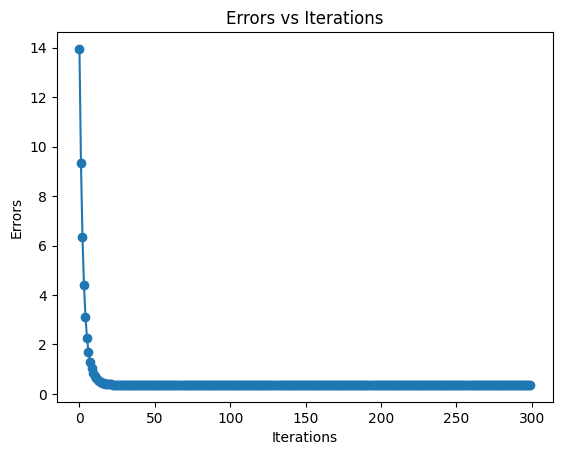

sklearn mse:0.23366710810280558
 manual model mse:[0.36561476]
Manual method: y = 1.3398821218074652*x+ 0.30451866404715094, MSE:[0.36561476]
Sklearn Linear Regression: y = 1.567098293113596*x + -0.035638610947616556, MSE = 0.23366710810280558
Sklearn after Gradient Descent: y = 1.4150049677053476*x + 0.425537459979923 , MSE = 0.2571324150654296


C:\Users\rsurs\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


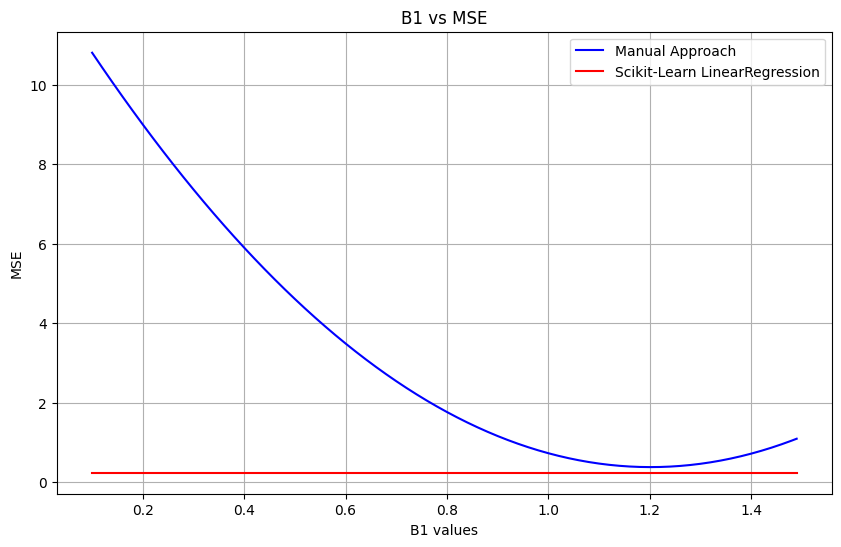

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('data.csv')
x = df['experience'].values
y = df['salary'].values

def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = (w*x[i]) + b
        cost = cost + (f_wb - y[i])**2
    cost = cost/m
    return cost

def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw,dj_db = 0,0
    for i in range(m):
        f_wb = (w*x[i]) + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = (f_wb - y[i])
    dj_dw += dj_dw_i
    dj_db += dj_db_i
    return dj_dw,dj_db

def gradient_descent(x,y,w_in,b_in,alpha,iters,epochs):
    w,b = w_in,b_in
    j_hist,p_hist,cost = [],[],[]
    for epoch in range(epochs):
        for i in range(iters):
            dj_dw,dj_db = compute_gradient(x,y,w,b)
            w -= dj_dw*alpha 
            b -= dj_db*alpha
            cost = compute_cost(x,y,w,b)
            j_hist.append(cost)
            p_hist.append([w,b])
            print(f"Epoch {epoch+1}/{epochs},Iteration {i}/{iters}, Cost:{cost}")
    return w,b,j_hist,p_hist

b1_val = [0.1,1.5,0.8]
b0 = 1.1
mse = []
for b1 in b1_val:
    cost = compute_cost(x,y,b1,b0)
    mse.append(cost)
plt.title('B1 vs MSE (Fixed intercept = 1.1)')
plt.scatter(b1_val,mse)
plt.plot(b1_val,mse)
plt.xlabel('B1 values')
plt.ylabel('MSE')
plt.show()

b1_val = np.arange(0.1,1.5,0.01)
b0 = 1.1 
mse = []
for b1 in b1_val:
    cost = compute_cost(x,y,b1,b0)
    mse.append(cost)
plt.title('B1 vs MSE (Fixed intercept = 1.1)')
plt.scatter(b1_val,mse)
plt.plot(b1_val,mse)
plt.xlabel('B1 values')
plt.ylabel('MSE')
plt.show()

b1_val = np.arange(0.1,1.5,0.01)
b0_val = b0_val = np.arange(0,1.5,0.01) 
mse_val = []
intercepts = []
for b0 in b0_val:
    mse = []
    for b1 in b1_val:
        mse.append(compute_cost(x,y,b1,b0))
    mse_val.append(mse)
plt.figure(figsize=(5,5))
plt.title("MSE vs B1 (different slope and intercepts)")
plt.xlabel('B1')
plt.ylabel('MSE')
for i,intercept in enumerate(b0_val):
    plt.plot(b1_val,mse_val[i],label = f'{intercept}')
plt.tight_layout()
plt.legend()
plt.show()
        
w_in,b_in = 0,0 
iters = 60
alpha = 0.01
epochs = 5
w,b,j_hist,p_hist = gradient_descent(x,y,w_in,b_in,alpha,iters,epochs)
plt.title('Errors vs Iterations')
plt.scatter(range(len(j_hist)),j_hist)
plt.plot(range(len(j_hist)),j_hist)
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.show()

x,y = df['experience'].values.reshape(-1,1),df['salary'].values.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
mse = mean_squared_error(y,y_pred)
print(f"sklearn mse:{mse}\n manual model mse:{compute_cost(x,y,w,b)}")

sgd_regressor = SGDRegressor(max_iter=60)
sgd_regressor.fit(x,y)
y_pred = sgd_regressor.predict(x)
sgd_mse = mean_squared_error(y,y_pred)
print(f"Manual method: y = {w}*x+ {b}, MSE:{compute_cost(x,y,w,b)}")
print(f"Sklearn Linear Regression: y = {model.coef_[0][0]}*x + {model.intercept_[0]}, MSE = {mse}")
print(f"Sklearn after Gradient Descent: y = {sgd_regressor.coef_[0]}*x + {sgd_regressor.intercept_[0]} , MSE = {sgd_mse}")


b1_val = np.arange(0.1, 1.5, 0.01)

# Initialize lists to store MSE values for both methods
manual_mse_values = []
sklearn_mse_values = []

# Loop through B1 values and compute MSE for manual approach and scikit-learn LinearRegression
for b1 in b1_val:
    manual_w = b1  # Assuming B0 is fixed at 1.1 as in your code
    manual_b = 1.1
    manual_mse = compute_cost(x, y, manual_w, manual_b)
    manual_mse_values.append(manual_mse)
    
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    sklearn_mse = mean_squared_error(y, y_pred)
    sklearn_mse_values.append(sklearn_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.title('B1 vs MSE')
plt.plot(b1_val, manual_mse_values, label='Manual Approach', color='blue')
plt.plot(b1_val, sklearn_mse_values, label='Scikit-Learn LinearRegression', color='red')
plt.xlabel('B1 values')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()